---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas
(phân phối)

---
Phân phối nhị thức
<p>    np.random.binomial(n,p,size)</p>
<br>Trong đó
   <br>n: số lần thực hiện trong 1 phép thử
   <br>p: xác xuất của 1 lần thực hiện, p = 0.5 pp nhị thức đều
   <br>size: số phép thử
---

In [1]:
import pandas as pd
import numpy as np

In [26]:

#sử dụng phân phối nhị thức, (1 lần random, xác suất = 0.5)
np.random.binomial(1, 0.5)


1

In [52]:
# số được tạo từ được là tổng từ 1000 lần random, rồi chia 1000 --> giá trị thu được tiến đến 0.5
np.random.binomial(1000, 0.5)/1000 


0.509

# Vd: Thực hiện 1000 phép thử tung xúc sắc, mỗi phép thử thực hiện 20 lần tung, tính tỉ lệ phép thử có số điểm >15. (0: sấp, 1: ngửa)

In [121]:
x = np.random.binomial(20,0.5,1000)
(x>15).mean()
#ở đây trả về tỉ lệ x>15 trong mảng x
#nếu là x.mean() sẽ trả về giá trị trung bình x

0.0070000000000000001

In [122]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)
#tỉ lệ lốc xoáy


14

In [123]:
#in ra thời gian mà có 2 ngày có lốc xoáy
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

103 tornadoes back to back in 2739.72602739726 years


In [124]:
np.random.uniform(0, 1)
#phân phối đều 

0.27976289999251713

In [125]:
np.random.normal(0.75)
#phân phối chuẩn

0.4041571892905017

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [126]:
distribution = np.random.normal(0.75,size=1000)
# 0.75 là giá trị mong muốn, thực hiện 1000 mẫu, độ lệch chuẩn bằng 1
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))
#Với độ lệnh chuẩn 0.75, size = 1000 thì xác suất x rơi vào là 0.98 ??

0.9976182236098825

In [127]:
#Sử dụng std
np.std(distribution)

0.9976182236098825

In [128]:
#phân phối chi bình phương
import scipy.stats as stats
stats.kurtosis(distribution)

-0.04814982546600488

In [129]:
stats.skew(distribution)

0.044391160190613135

In [130]:
# phân phối chi bình phương với bậc = 2
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.0152291605065975

In [131]:
#phân phối chi bình phương với bậc = 5,  độ nghiêng dịch chuyển về bên trái
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.298717390536987

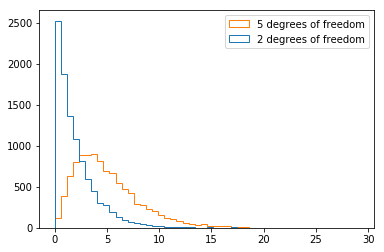

In [132]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [32]:
df = pd.read_csv('grades.csv')

In [33]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [34]:
len(df)

2315

In [35]:
#chia dữ liệu thành 2 phần, người nộp bài sớm và muộn
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [36]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [37]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [38]:
from scipy import stats
stats.ttest_ind?
#thư viên scipy chứa số lượng các bài kiểm tra thống kê khác nhau và các dạng cơ bản trong kiểm tra giả thuyết trong python

In [39]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [40]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [41]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)